# <center> Module 1 

Group: <br>
Darko Petrov <br>
Alexander Lendon

### <center> Q1. Gaussian Models.

#### 1
a)

$$
- log L(\mu, \sigma^2, X) = \frac{n}{2} log (2\pi) + \frac{n}{2} log (\sigma^2) + \frac{1}{2 \sigma^2} \sum^n_{i=1}(X_i-\mu)^2
$$

b) 

To find the maximum likelihood we need to derivate with respect to $\mu$ and $\sigma$ as shown below 
for $\mu$ 
$$
\frac{d}{d\mu} - log L(\mu, \sigma, X) = \frac{1}{2 \sigma^2} \sum^n_{i=1}2(X_i-\mu)
$$

for $\sigma^2$
$$
\frac{d}{d\sigma} - log L(\mu, \sigma, X) = \frac{n}{2\sigma^2}+\frac{1}{2\sigma^4}\sum^n_{i=1}(X_i-\mu)^2
$$

c) For a test in a class room $\mu$ is the mean result of the students. Two factors drive this variable, the difficulty of the test and the preparedness of the students. A more diffcult test a lower mean is suited. Similarly lower preparedness of students would also suit a lower mean value.

The variance of results is denoted by $\sigma$, this indicates the spread of the results. For a difficult test or student group with diverse abilities a larger variance would be suitable. A small sigma value would be suitable for easier test and with good student preparation or similar abilities.

#### 2

a)

$$
p(y_i | x_i, \theta) = \mathcal{N}(y_i | x_i^T \theta +\mu, \sigma^2)
$$

$$
L(\theta) = -\sum_{i=1}^N \log (p(y_n|x_n,\theta)) = -\sum_{i=1}^N  \log (\mathcal{N}(y_i | x_i^T \theta +\mu, \sigma^2))
$$

$$
 = - \sum_{i=1}^N \log\left(\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{y_i-x_i^T\theta-\mu}{2\sigma^2}}\right)
$$

$$
=-\sum^N_{i=1}\log \left(e^{-\frac{-y_i-x_i^T\theta-\mu}{2\sigma^2}}\right)-\sum^N_{i=1}\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)
$$


$$
=\frac{1}{2\sigma ^2}\sum_{i=1}^N(y_i-x_i^T\theta-\mu)^2-N\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)
$$


b)

Take the derivative of the negative log likelihood function with respect to $\sigma^2$. Setting the resulting expression to zero and solving for $\sigma^2$ gives the maximum likelihood estimate for $\sigma^2$.
$$
\frac{\partial{P}}{\partial{\sigma^2}} = -\frac{N}{2\sigma^2}+\frac{1}{2\sigma^4}\sum^N_{i=1}x_i(y_i-(\theta^T x_i+\mu))^2=0
$$
Rearrange for $\sigma^2$
$$
\frac{N}{2\sigma^2} = \frac{1}{2\sigma^4}\sum^N_{i=1}x_i(y_i-(\theta^T x_i+\mu))^2
$$
$$
\sigma^2 = \frac{1}{N}\sum^N_{i=1}x_i(y_i-(\theta^T x_i+\mu))^2
$$

Similarly minimising the negative log likelihood function with resepect to $\hat\theta$,$\hat\mu$ gives the maximum likelihood estimate for $\hat\theta$ and $\hat\mu$. When minimising the expression for $\mathcal{L}(\theta,\mu,\sigma^2)$ the constant terms behave as a scaling factor and as such do not contribute to the optimisation of the location of minimum. Hence the resulting expression for this is:

$$
\hat\theta,\hat\mu = \text{argmin}_{\theta\mu}\sum_{i=1}^N(y_i-\theta^T x_i-\mu)^2
$$

c) The L2 regularisation can be incorporated into the likelihood function as a gaussian prior defined as 

$$
p(\theta)=\mathcal{N}(\theta|0,\lambda−1) = \sqrt{\frac{\lambda}{2\pi}}e^{-\frac{\lambda}{2}||\theta||^2_2}
$$

Taking negative log of this expression
$$
-\log p(\theta)=-\log\left(\sqrt{\frac{\lambda}{2\pi}}\right) -\log\left( e^{-\frac{\lambda}{2}||\theta||^2_2}\right)
$$
$$
=-\log\left(\sqrt{\frac{\lambda}{2\pi}}\right) +\left({\frac{\lambda}{2}||\theta||^2_2}\right)
$$
We can add this to the likelihood expression obtained previously
$$
L(\theta)=\frac{1}{2\sigma ^2}\sum_{i=1}^N(y_i-x_i^T\theta-\mu)^2-N\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) -\log\left(\sqrt{\frac{\lambda}{2\pi}}\right) +\left({\frac{\lambda}{2}||\theta||^2_2}\right)
$$
and minimising this expression with respect to $\theta$ $\mu$.
$$
\hat\theta,\hat\mu = \text{argmin}_{\theta\mu}\sum_{i=1}^N(y_i-\theta^T x_i-\mu)^2 +{\lambda||\theta||^2_2}
$$
Again constants are ignored as part of the minimisation.

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.576
Method:                         Least Squares   F-statistic:                     94.59
Date:                        Wed, 08 Nov 2023   Prob (F-statistic):           4.86e-74
Time:                                22:07:01   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2988.
Df Residuals:                             407   BIC:                             3016.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

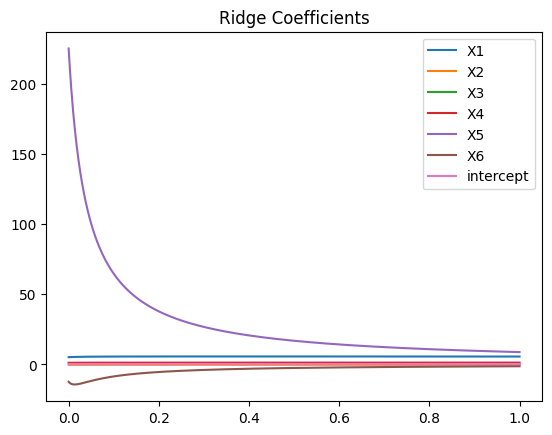

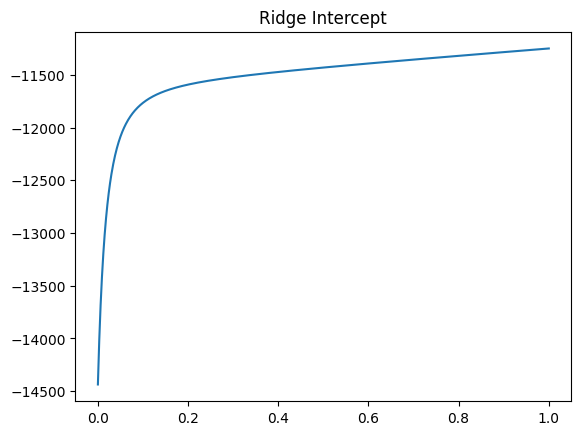

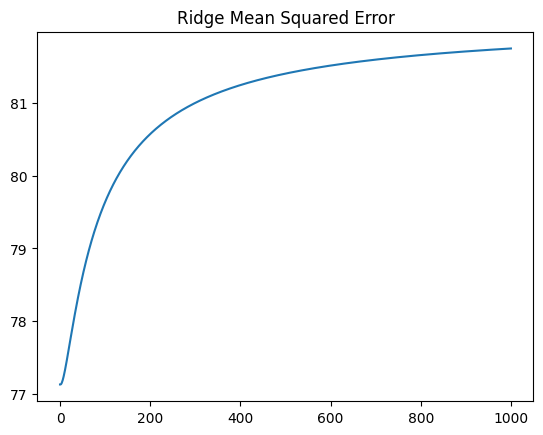

In [42]:
import pandas
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Loading the data
data0=pandas.read_csv('Real estate.csv')


# Separate x and y and remove the first column as it is the number of the sample


def pricing(data):
    X = data.drop('Y house price of unit area', axis=1)
    X = X.drop('No', axis=1)
    X['intercept'] = 1 
    y = data['Y house price of unit area']
    
    
    
    ols_model = sm.OLS(y, X).fit()
    print(ols_model.summary())
    y_hat = ols_model.predict(X)
    print("OLS mse: ",mean_squared_error(y, y_hat))
    
    
    # Ridge Regression
    alpha_values = np.linspace(0,1, 1000)
    alpha_values = np.insert(alpha_values, 0, 0.)
    ridge_models = {}
    ridge_coefs = []
    ridge_inter = []
    ridge_mse = []

    for alpha in alpha_values:
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X, y)
        ridge_models[alpha] = ridge_model
        y_hat = ridge_model.predict(X)
        mse = mean_squared_error(y, y_hat)
        ridge_mse.append(mse)
        ridge_coefs.append(ridge_model.coef_)
        ridge_inter.append(ridge_model.intercept_)
        

    plt.figure()
    plt.title("Ridge Coefficients")
    plt.plot(alpha_values,(ridge_coefs), label=['X1', "X2", "X3", "X4", "X5", "X6", "intercept"])
    plt.legend()
    plt.figure()
    plt.title("Ridge Intercept")
    plt.plot(alpha_values,ridge_inter, label='Intercept')
    plt.figure()
    plt.title("Ridge Mean Squared Error")
    plt.plot(ridge_mse)

pricing(data0)

d)

i) From the $\hat\theta$ we can see the most important factor in the data as the 'X5 latitude'  as it has the largest absolute coefficient giving the highest importance and making the most impact on the data. The 'X6 longitude' is the second most impacteful factor but not as much as the 'X5 latitude'

ii) The intercept $\mu$ is important as it represents the baseline price when all features are zero. Ignoring it would result in incorrect predictions.

iii) $\hat\sigma$ gives the vaiance of the data. Smaller values of $\hat\sigma$ indicate the factors have a better fit to the data.

iv) With the increase of $\lambda$ the coefficients go twords 0 and the $\hat\sigma$ decreases logarithmically. 

v) In the code below it can be observed that the coefficients follow the same pattern as the whole data. The intercept is what sets tham appart as in 2012 is positive and in 2013 is more negative than the whole data. But both cases follow the same lambda behavior as with the increase of lambda they are going towards zero. Considering the mean squared error for this case the 2012 data gives mutch lower score than 2013, but it seems to be better to seperate them as the score over the 2012 is more lower from the whole dataset than the whole data is lower from the 2013 scores. 

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.755
Model:                                    OLS   Adj. R-squared:                  0.743
Method:                         Least Squares   F-statistic:                     61.27
Date:                        Wed, 08 Nov 2023   Prob (F-statistic):           4.36e-34
Time:                                21:57:21   Log-Likelihood:                -407.65
No. Observations:                         126   AIC:                             829.3
Df Residuals:                             119   BIC:                             849.2
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

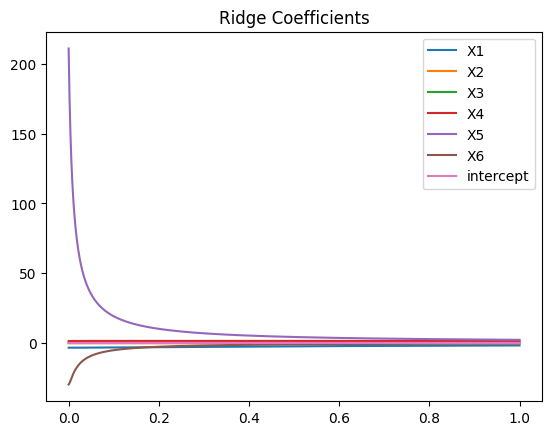

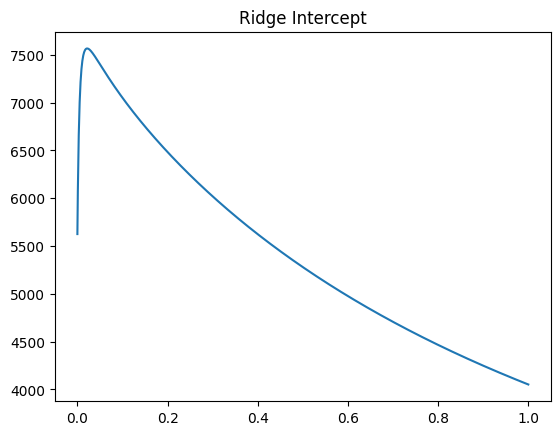

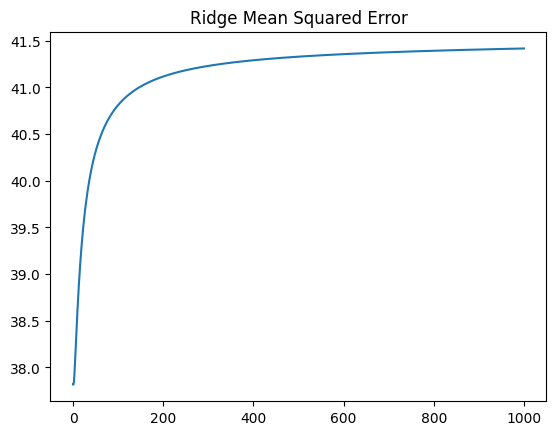

In [38]:
data2012 = data0[data0['X1 transaction date'] >= 2012]
data2012 = data2012[data2012['X1 transaction date'] < 2013]
pricing(data2012)

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.532
Model:                                    OLS   Adj. R-squared:                  0.522
Method:                         Least Squares   F-statistic:                     53.23
Date:                        Wed, 08 Nov 2023   Prob (F-statistic):           1.37e-43
Time:                                21:57:32   Log-Likelihood:                -1059.4
No. Observations:                         288   AIC:                             2133.
Df Residuals:                             281   BIC:                             2159.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

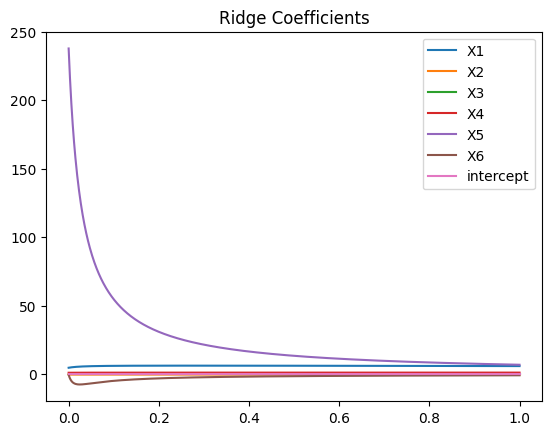

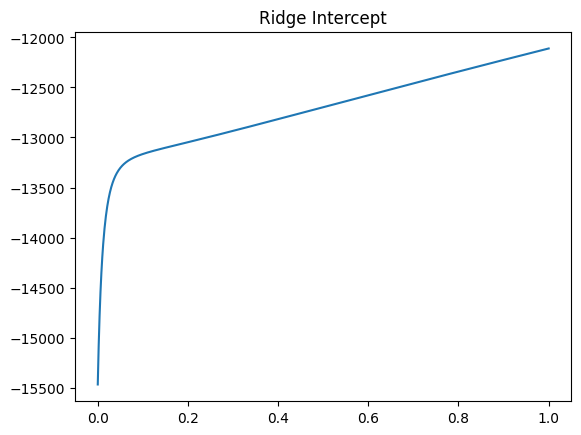

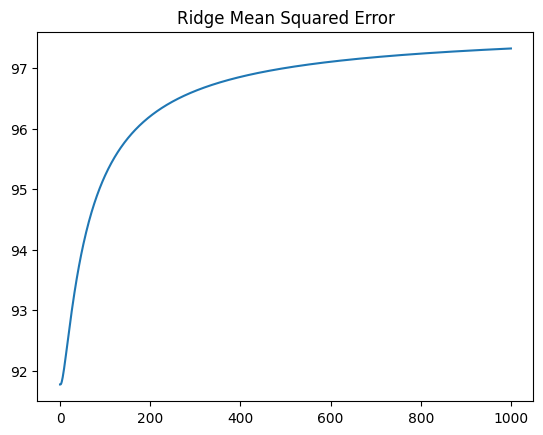

In [39]:
data2013 = data0[data0['X1 transaction date'] >= 2013]
data2013 = data2013[data2013['X1 transaction date'] < 2014]
pricing(data2013)

#### 3

a)
Gaussian distribution
$$
p(x_i | \mu, R) = \frac{1}{(2\pi)^{m/2} |R|^{1/2}} \exp\left(-\frac{1}{2} (x_i - \mu)^T R^{-1} (x_i - \mu)\right)
$$

Likelihood function is a product of all the distributions 

$$
p(\{x_i\} | R, µ) = Π p(x_i | µ, R)
$$
$$
p(\{x_i\} | R, \mu)) = \prod_{i=1}^n\frac{1}{(2\pi)^{m/2} |R|^{1/2}} \exp\left(-\frac{1}{2} (x_i - \mu)^T R^{-1} (x_i - \mu)\right)
$$

b) 
$$
p(R) ∝ e^{-λ \cdot Tr[R^{-1}]} = e^{-λ \cdot Tr[S]}
$$

$$
\text{argmax}_{µ, R} [p({xi} | µ, R) \cdot p(R)]
$$


Take the negative log of prior
$$
-\log(p(R)) = λ \cdot Tr(R^{-1})
$$

$$
%-\log(p({x_i} | µ, R)) = \sum_{i=1}^n [\frac{1}{2}\cdot (x_i - µ)^T \cdot R^{-1} \cdot (x_i - µ)]
$$
negative log likelihood is also:
$$
    -\log(p(\{x_i\} | R, \mu)) = -\frac{n}{2}\log({(2\pi)^{-m} |R|^{-1}}) +\left(\frac{1}{2} \sum_{i=1}^n (x_i - \mu)^T R^{-1} (x_i - \mu)\right)
$$
Combine the prior and the likelihood function from part 3a) to give the map estimator, in log format they can be summed.
$$
\log(p({x_i} | µ, R))+\log(p(R)) =  
-\frac{n}{2}\log({(2\pi)^{-m} |R|^{-1}}) +
\sum_{i=1}^n \left[\frac{1}{2} \cdot (x_i - µ)^T \cdot \text{Tr}(R^{-1}) \cdot (x_i - µ)\right]+
\lambda \cdot I(R^{-1})
$$
Differentiate with respect to R to find R that maximises the negative log function. 
$$
\frac{∂}{∂R} [\log(p(R)) + \log(p({x_i} | µ, R))] = 0
$$
$$
\frac{n}{2}|R^{-1}| - \frac{1}{2}R^{-2}(x_i-\mu)(x_i-\mu)^T-\lambda R^{-2} = 0
$$
Rearrange for R 
$$
 \frac{1}{2}R^{-1}\left((x_i-\mu)(x_i-\mu)^T+ 2\lambda \right) = \frac{n}{2}
$$

$$
R = \frac{(x_i-\mu)(x_i-\mu)^T}{n}+\frac{2\lambda}{n}I  = 0
$$
Differentiate with respect to $\mu$ to find the value which maximises the negative log function.
$$
\frac{∂}{∂\mu} [\log(p(R)) + \log(p({x_i} | µ, R))] = 0
$$
$$
=\sum_{i=1}^n\left[\frac{1}{2} \cdot (x_i - µ)^2 \cdot I(R^{-1})\right]
$$

$$
(nR^{-1})\sum_{i=1}^n\left[(x_i - µ) \right] = 0
$$

$$
-n\mu+\sum_{i=1}^n\left[x_i \right] = 0
$$
Rearrange for $\mu$:
$$
\mu = \frac{\sum_{i=1}^n x_i}{n}
$$


#### 4





In [140]:
import pandas
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


# Read the tsv file and convert to numpy:
data=pandas.read_csv('TCGA-BRCA.tsv',sep='\t')
npdata=data.to_numpy()
data_clean=npdata[1:,2:].astype('float')


def find_genes(case:str = "b", lam:float=0.1, t:float=0.01):
    if case == "a":
        selected_genes = data_clean[:, :100]
    elif case == "b":
        gene_variances = np.var(data_clean, axis=0)
        selected_gene_indices = np.argsort(gene_variances)[-100:]
        selected_genes = data_clean[:, selected_gene_indices]
    else:
        raise ValueError("Invalid case")

    sample_covariance_matrix = np.cov(selected_genes, rowvar=False)
    I = np.zeros(sample_covariance_matrix.shape)
    np.fill_diagonal(I, lam)
    sample_covariance_matrix += I
    sample_precision_matrix = np.linalg.inv(sample_covariance_matrix)
    
    # Create Graph
    plt.figure()
    graph = nx.Graph()
    # Iterate through elements of the precision matrix and add edges if the element is larger than 't'
    n, _ = sample_precision_matrix.shape
    for i in range(n):
        for j in range(i + 1 , n):
            if abs(sample_precision_matrix[i, j]) > t:
                graph.add_edge(i, j)

    nx.draw(graph, with_labels=False, node_size=70)
    plt.title(f"Case {case}) Graph with t={t} and λ={lam}")
    plt.show()
    return np.mean(selected_genes)


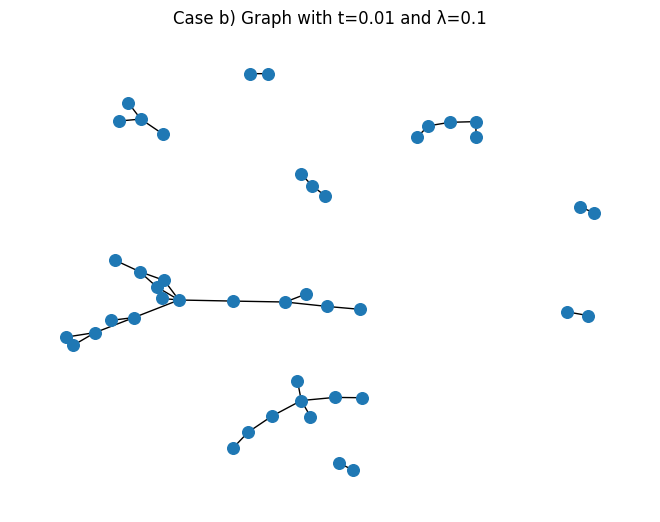

7.000421039193535

In [141]:
find_genes("b", 0.1, 0.01)

a) $\lambda$ is impacting the variance of the genes and this makes regulating the threshold easier. Lambda can be set to 0 that will give the original variance of the genes. 

b) Selecting the threshold may involve experimentation and domain knowledge therefore for this example the threshold was selected to 0.01 to achive avoid overclustering of too many genes. 

c)

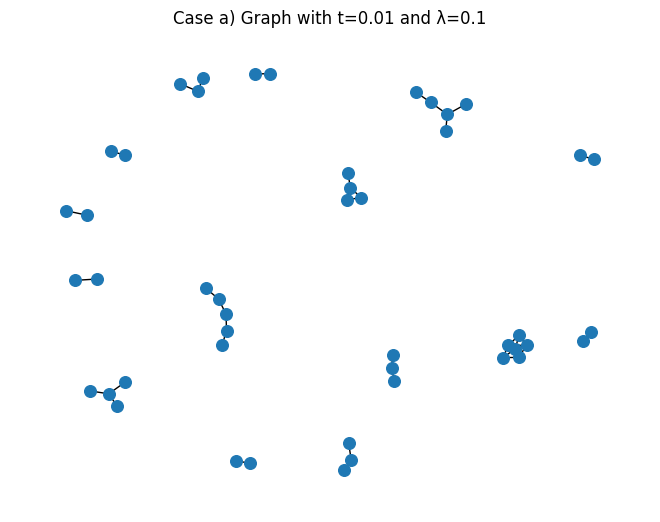

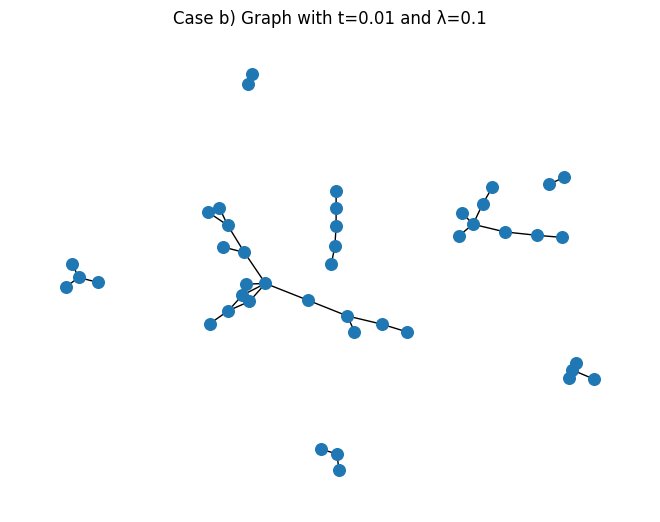

In [142]:
mu_a = find_genes("a", 0.1, 0.01)
mu_b = find_genes("b", 0.1, 0.01)

d)

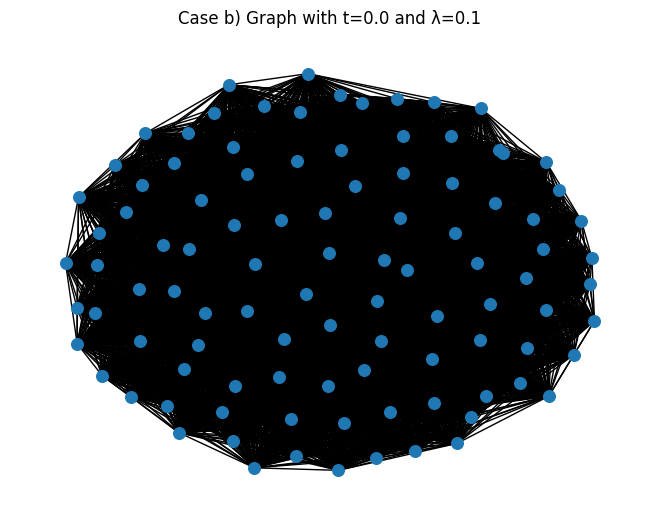

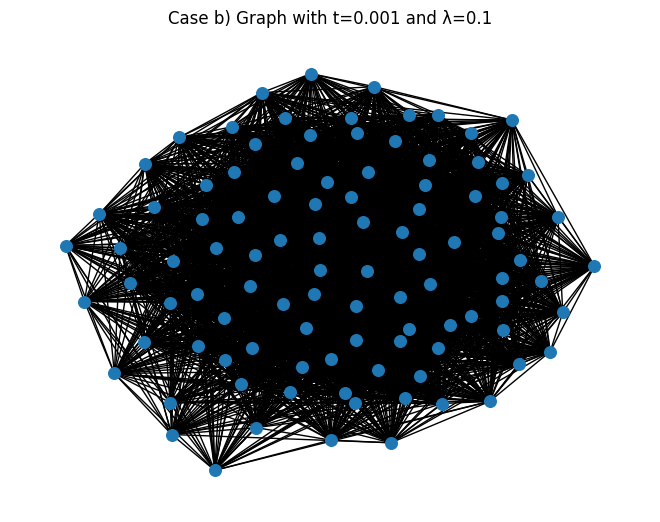

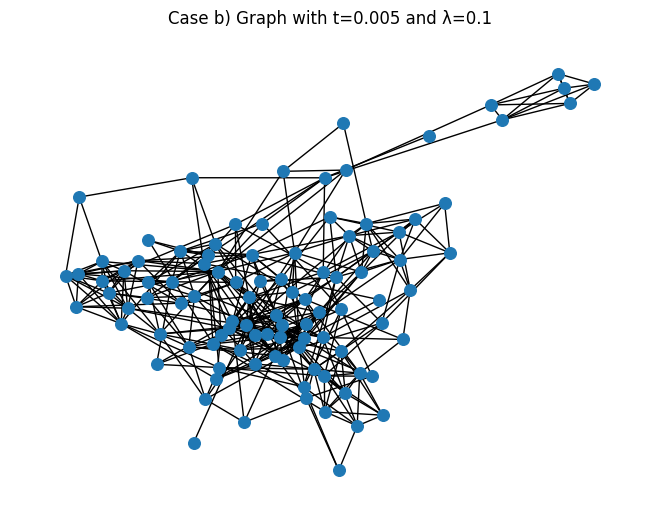

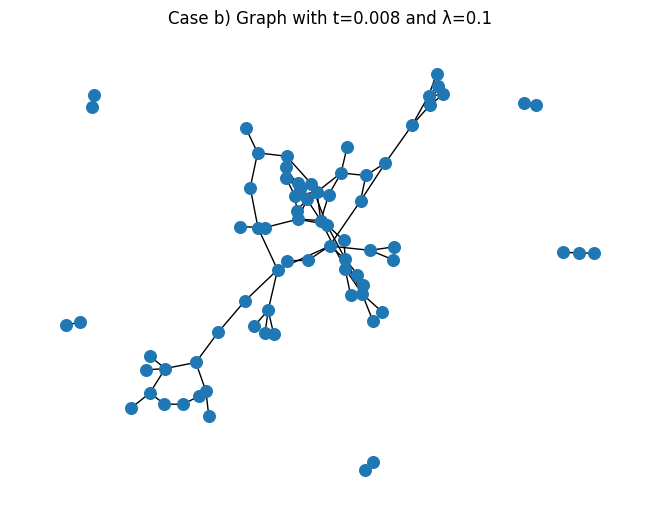

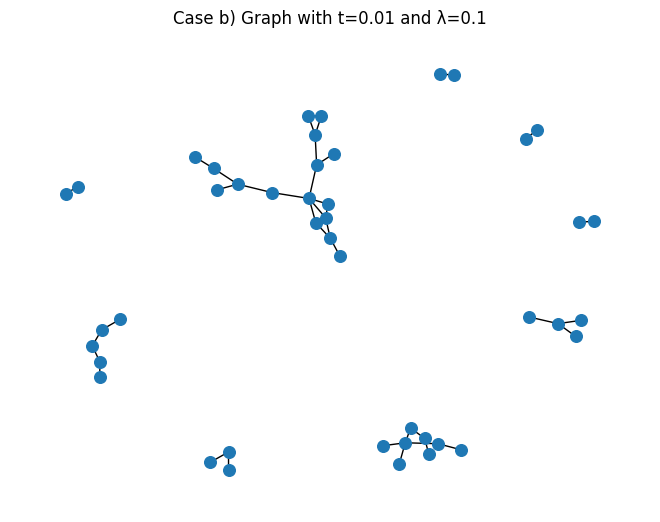

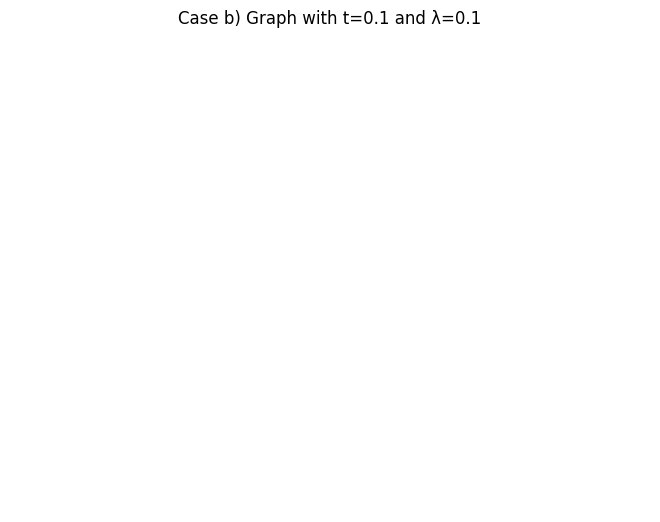

In [143]:
threshholds = [0.0, 0.001, 0.005, 0.008, 0.01, 0.1]
for t in threshholds:
    find_genes("b", 0.1, t)

e) Large value of $\mu$ means that the gene is highly expressed across the samples in the dataset. This is due the majority of genes have higher value and that can mean there is less variation. 

In [144]:
print("Mean of a:", mu_a)
print("Mean of b:", mu_b)

Mean of a: 7.3511430130956885
Mean of b: 7.000421039193535


### <center> Q2. Logistic Regression

#### 1
For the case that Y=1.
$$
Pr[Y=1|x] = \frac{odds(Y|x)}{1 + odds(Y|x)}
$$

$$
Pr[Y=0|x] = \frac{e^{\theta^Tx+\mu}}{1 + e^{\theta^Tx+\mu}}
$$

For the case that Y=0.
$$
Pr[Y=0|x] = \frac{1}{1 + odds(Y|x)}
$$

$$
Pr[Y=0|x] = \frac{1}{1 + e^{\theta^Tx+\mu}}
$$
The probability of the data is then:
$$
p(\theta,\mu|x_i,y_i) = \prod^n_{i=1} Y_i{\left(\frac{e^{\theta^Tx+\mu}}{1 + e^{\theta^Tx+\mu}}\right)}^{y_i} + {\left(1-\frac{e^{\theta^Tx+\mu}}{1 + e^{\theta^Tx+\mu}}\right)}^{y_i-1}
$$
Applying this to the negative log likelihood function we get:

$$
-\log{L(\theta, \mu, X, Y) = -\sum^n_{i=1}Y_i\log{\left(\frac{e^{\theta^Tx+\mu}}{1 + e^{\theta^Tx+\mu}}\right)} + (1-Y_i) \log{\left(1-\frac{e^{\theta^Tx+\mu}}{1 + e^{\theta^Tx+\mu}}\right)} }
$$

#### 2


In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression

def log_reg(case:str = 1):
    data=np.zeros((683,10))
    label=np.zeros(683)
    count=0


    # The file for the dataset is found in the assignment
    with open('breast-cancer.txt', 'r') as f:
        for x in f:
            x1=x.strip()
            y=x1.split(' ')
            label[count]=(float(y[0])-2)/2
            for k in range(10):
                h=y[k+2].split(':')
                # Here we make the distinction between the first variable and the rest
                # You should implement the two cases
                if case == 1:
                    data[count,k]=float(h[1])
                elif case == 2:
                    if k==0:
                        data[count,k]=float(h[1])/1000000
                    else:
                        data[count,k]=float(h[1])
                else:
                    raise ValueError("Invalid Case try 1 or 2")
            count+=1

                
    # here you have data and labels. Note that the labels are -1 and 1        

    # Use the sklearn library to implent logistic regression
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    # Train by the ".fit" method
    # After training you can calculate the predictions by the ".score" method or
    # use ".predict" method and count manually


    X_train = data[:500]
    y_train = label[:500]
    X_test = data[500:]
    y_test = label[500:]


    # Create a Logistic Regression model
    logistic_model = LogisticRegression()

    # Train the model on the training data
    logistic_model.fit(X_train, y_train)

    # Calculate the accuracy on the test data
    accuracy =  logistic_model.score(X_test,y_test)


    # Print the accuracy
    print(f"Accuracy for Case {case}: {accuracy * 100:.2f}%")
    print("Coefficients: ", logistic_model.coef_)


log_reg(1)
log_reg(2)

Accuracy for Case 1: 77.05%
Coefficients:  [[-4.38418715e-07  1.02458618e-11  1.19776396e-11  1.19918581e-11
   9.50345158e-12  7.43525153e-12  1.52198728e-11  7.80024521e-12
   1.07802135e-11  3.80342872e-12]]
Accuracy for Case 2: 100.00%
Coefficients:  [[ 0.10124302  0.51957796 -0.05453361  0.31650104  0.29195348  0.12337555
   0.36326314  0.35259347  0.19394253  0.43613779]]


a)

The accuracy in the second case increases to 100% this can be because in the first case when the data is not dividet by 1e6 the first column gives mutch larger numerical range compared to the other variables. This can cause logistic regression to assign higher importance to theat columns than the other values. And in the second case when the data is reguliresed all variables have similar importance to predicting the outcome. 

b)

Inspepcting the coefficients in the second case we can see that the second variable has the biggest importance and last variable has the next highest meaning theese give bigger impact to the prediction and considering achiving 100% thay may seem the most importent genes.  

c)

The accuracy is 100% for the second case this is very well result. This can be the product of improving the model by rescaling the data but also smaller data size was used with only have 683 data points the model can be overfiting and thus producing realy good results as small data size makes it mutch more easier to overfit. 

### <center> Q3

#### 1

#### 2

a)



b)